In [12]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [6]:
df=pd.read_csv(r"..\Data\insurance.csv")
df.head()

age  gender     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

Text(0.5,1,'Histogram of charges')

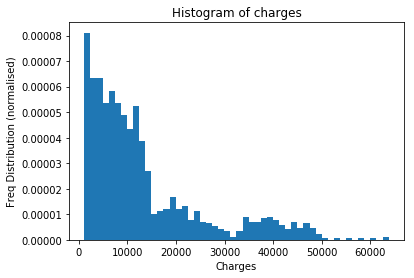

In [10]:
df.charges.plot.hist(bins=50,density=True)
plt.xlabel("Charges")
plt.ylabel("Freq Distribution (normalised)")
plt.title("Histogram of charges")


#### Helps us to see that the above graph has three regions mainly

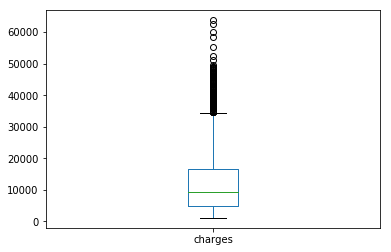

In [11]:
df.charges.plot.box()

#### Depicts that the insurance dataset has lot of outlier

In [15]:
def find_outliers(y):
    q1, q2, q3=np.percentile(y,[25,50,75])
    iqr=q3-q1
    upper_whisker=np.min([q3+1.5*iqr,np.max(y)])
    lower_whisker=np.max([q1-1.5*iqr,np.min(y)])
    return (y>upper_whisker)|(y<lower_whisker)
outliers=find_outliers(df.charges)
outliers[:10]

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: charges, dtype: bool

In [17]:
df.charges[outliers].head()

14    39611.7577
19    36837.4670
23    37701.8768
29    38711.0000
30    35585.5760
Name: charges, dtype: float64

In [19]:
df.charges[outliers].shape

(139,)

#### 139 Outliers

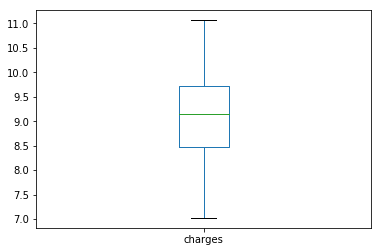

In [20]:
np.log(df.charges).plot.box()

In [21]:
df.region.value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

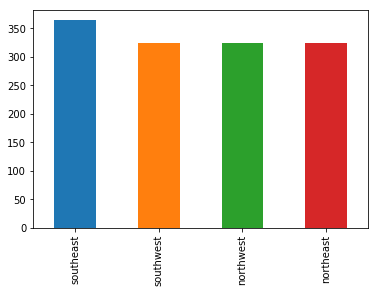

In [23]:
df.region.value_counts().plot.bar()

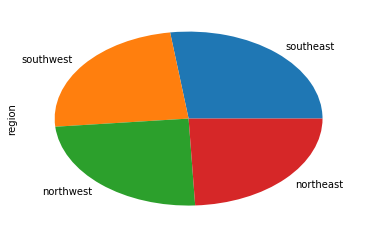

In [24]:
df.region.value_counts().plot.pie()

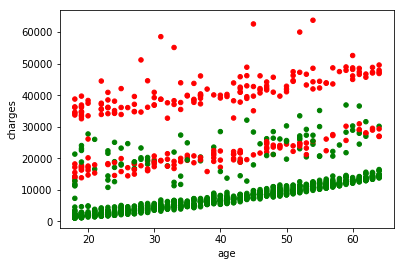

In [29]:
colors=np.where(df.smoker=="yes","red","green")
df.plot.scatter("age","charges",c=colors)

#### Depicts that those who smoke pay usually high charges for insurance

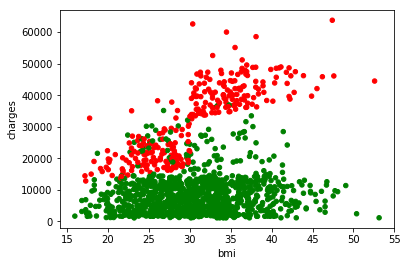

In [30]:
colors=np.where(df.smoker=="yes","red","green")
df.plot.scatter("bmi","charges",c=colors)

#### charges are more for the people who are smoker and have bmi on higher side

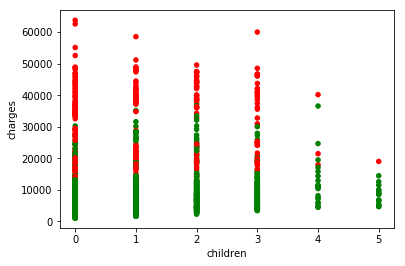

In [31]:
colors=np.where(df.smoker=="yes","red","green")
df.plot.scatter("children", "charges", c=colors)

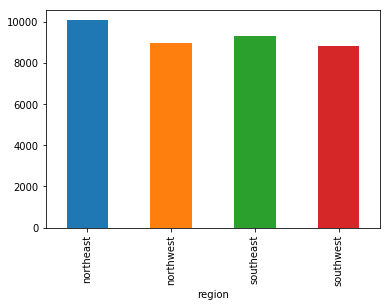

In [33]:
df.groupby("region").charges.median().plot.bar()

#### Charges per region

In [34]:
#plotting library
import seaborn as sns

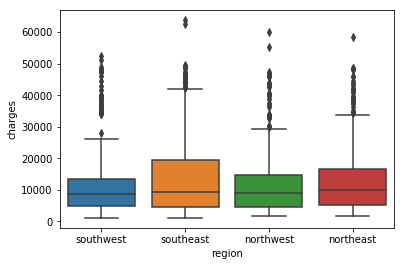

In [35]:
sns.boxplot("region","charges",data=df)

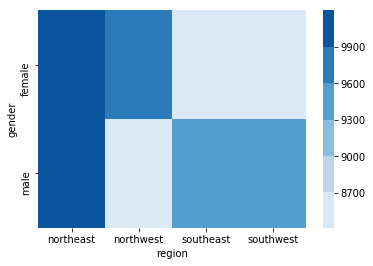

In [39]:
agg=df.groupby(["gender","region"]).charges.median().unstack()
sns.heatmap(agg, cmap=sns.color_palette("Blues"))

#### Heat map